In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# df = pd.read_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/TMDB_movie_dataset_v11.csv")
df = pd.read_csv("C:\\Users\\orfor\\OneDrive\\Desktop\\NeedleInADataHaystack\\data\\TMDB_movie_dataset_v11.csv")

In [10]:
df.head(10)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,False,/en971MEXui9diirXlogOrPKmsEn.jpg,...,Deadpool,The origin story of former Special Forces oper...,72.735,/zq8Cl3PNIDGU3iWNRoc5nEZ6pCe.jpg,Witness the beginning of a happy ending.,"Action, Adventure, Comedy","20th Century Fox, The Donners' Company, Genre ...",United States of America,English,"superhero, anti hero, mercenary, based on comi..."
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,...,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa","sacrifice, magic, superhero, based on comic, s..."
7,550,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,False,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,...,Fight Club,A ticking-time-bomb insomniac and a slippery s...,69.498,/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg,Mischief. Mayhem. Soap.,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,"dual identity, rage and hate, based on novel o..."
8,118340,Guardians of the Galaxy,7.906,26638,Released,2014-07-30,772776600,121,False,/uLtVbjvS1O7gXL8lUOwsFOH4man.jpg,...,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",33.255,/r7vmZjiyZw9rpJMQJdXpjgiCOk9.jpg,All heroes start somewhere.,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,"spacec

In [11]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

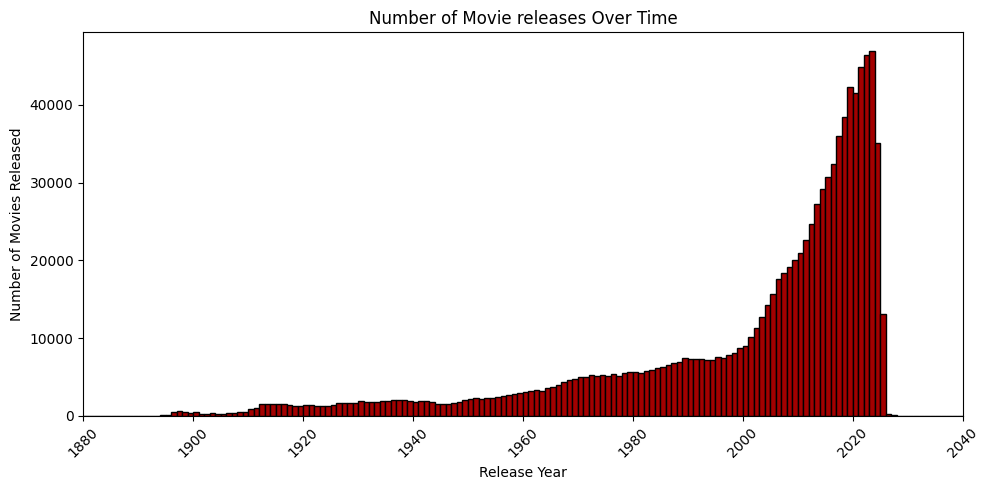

In [6]:
release_date_fixed = df['release_date'].str[:4].dropna().astype(int)
data = release_date_fixed.value_counts().sort_index()
# Repeat years based on their counts to prepare for histogram
years = data.index.repeat(data.values)


# Define start and end years for x-axis
start_year = 1880
end_year = 2040
K = 20

plt.figure(figsize=(10, 5))
plt.hist(years, bins=np.arange(start_year, end_year + 1, 1), edgecolor='black', color='#A40000')

plt.xticks(np.arange(start_year, end_year + 1, K), rotation=45)

plt.xlim(start_year, end_year)
plt.xlabel("Release Year")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movie releases Over Time")
plt.tight_layout()
plt.savefig("release_years_histogram.png", dpi=300)
plt.show()


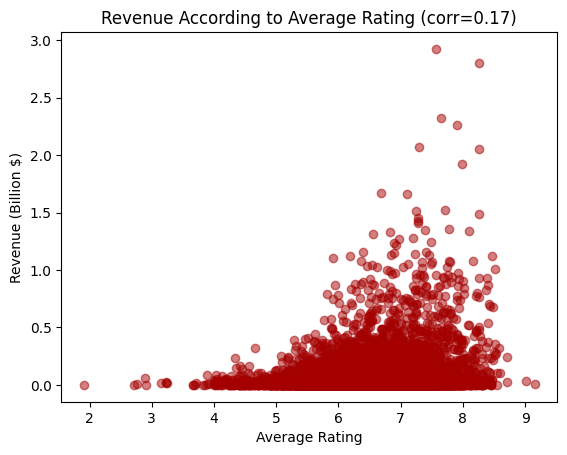

In [64]:
revenue_df = df[(df['revenue'] > 0) & (df['revenue'] < 3000000000) & (df['vote_average'] > 0) & (df['vote_average'] < 10)
& (df['vote_count'] > 100)]
plt.scatter(revenue_df['vote_average'], revenue_df['revenue'], color='#A40000', alpha=0.5)
correlation = revenue_df['vote_average'].corr(revenue_df['revenue'])
plt.title(f'Revenue According to Average Rating (corr={correlation:.2f})')
plt.xlabel('Average Rating')
plt.ylabel('Revenue (Billion $)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e9:.1f}'))
plt.savefig("revenue_average.png", dpi=300)
plt.show()

In [53]:
revenue_df[revenue_df['vote_average'] >= revenue_df['vote_average'].max() - 0.5]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
14,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,122.610,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,Fear can hold you prisoner. Hope can set you f...,"Drama, Crime",Castle Rock Entertainment,United States of America,English,"prison, friendship, police brutality, corrupti..."
53,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",158.448,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,An offer you can't refuse.,"Drama, Crime","Paramount, Alfran Productions",United States of America,"English, Italian, Latin","based on novel or book, loss of loved one, lov..."
12813,730647,Break the Silence: The Movie,9.154,175,Released,2020-09-10,8954945,90,False,/8vDzqxZvrp7IdyAI5F8NePWGyEP.jpg,...,브레이크 더 사일런스: 더 무비,K-pop sensation BTS embark on their 2019 'Love...,7.198,/k1VK2L971GmEevIjFbjcimxSeMx.jpg,Borahae.,"Music, Documentary","Big Hit Entertainment, CJ CGV, HYBE",South Korea,Korean,"pop star, pop music, concert film, boy band, k..."
16855,939984,BTS Permission to Dance On Stage - Seoul: Live...,9.018,113,Released,2022-03-12,32600000,195,False,/ttsFffDoso5BIqNugMoQDBI9A34.jpg,...,BTS Permission to Dance On Stage - Seoul: Live...,Join us as BTS and ARMY become one once again ...,6.877,/d5Qg9sbntjqmuswpIuF7BltuUZq.jpg,NaN,Music,"HYBE, Big Hit Entertainment",South Korea,"English, Korean","concert, live performance, concert film, k-pop..."


In [55]:
revenue_df[revenue_df['vote_average'] <= revenue_df['vote_average'].min() + 1.5]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
2259,14164,Dragonball Evolution,2.890,1906,Released,2009-03-12,58228460,85,False,/oHrrgAPEKpz0S1ofQntiZNrmGrM.jpg,...,Dragonball Evolution,"On his 18th birthday, Goku receives a mystical...",31.433,/23PcKOqNdhKeMFzORzQGn5eC44N.jpg,The legend comes to life.,"Action, Adventure, Fantasy, Science Fiction, T...","World Film Magic, Dune Entertainment, Star Ove...","Hong Kong, United Kingdom, United States of Am...","English, Japanese, Hindi","superhero, karate, revenge, dragon, based on m..."
4062,13805,Disaster Movie,3.230,959,Released,2008-08-29,14109284,87,False,/5V6jAFS0Q49SI07qjyFRMYlbfR9.jpg,...,Disaster Movie,"The filmmaking team behind the hits ""Scary Mov...",14.250,/3J8XKUfhJiNzwobUZVtizXYPe8b.jpg,Your favorite movies are going to be destroyed.,"Comedy, Science Fiction","3 in the Box, Lionsgate, Grosvenor Park Media,...",United States of America,English,"transvestite, natural disaster, parody, stupid..."
4836,5491,Battlefield Earth,3.228,751,Released,2000-05-12,29000000,117,False,/6JU73g7sse2l3O93HwqYdGawyPA.jpg,...,Battlefield Earth,"In the year 3000, man is no match for the Psyc...",13.416,/wXCRuBHdJ5aTFQdsuGJFXNdo79T.jpg,Take back the planet.,"Action, Adventure, Comedy, Science Fiction","Morgan Creek, Franchise Pictures, JTP Films, B...","Canada, United States of America","English, French","based on novel or book, dystopia, post-apocaly..."
6027,12142,Alone in the Dark,3.238,548,Released,2005-01-28,12693645,98,False,/lcLyZzhB1ctfdH0hGBsTFrbflqP.jpg,...,Alone in the Dark,Edward Carnby is a private investigator specia...,12.328,/bSxrbVCyWW077zhtpuYlo3zgyug.jpg,Can mankind defeat the army of darkness unleas...,"Action, Fantasy, Horror","Boll Kino Beteiligungs GmbH & Co. KG, Brightli...","Canada, Germany, United States of America",English,"island, monster, darkness, professor, detectiv..."
8065,11059,House of the Dead,3.152,355,Released,2003-04-11,13818181,90,False,/aNUEHLNsNMprLZt6fjf5nqDq6er.jpg,...,House of the Dead,"Set on an island off the coast, a techno rave ...",15.847,/lI6UBnxwHztggSq8PhLibdOe2Nd.jpg,You won't last the night.,"Horror, Action, Thriller","Herold Productions, Boll Kino Beteiligungs Gmb...","Canada, Germany, Japan, United States of America",English,"island, rave, based on video game"
11041,76994,Box Office 3D - Il film dei film,2.719,221,Released,2011-09-09,2777000,102,False,/wWRtoKyAJArhz1q5Z7cDFVFiIUn.jpg,...,Box Office 3D - Il film dei film,An Italian parody of the biggest U.S. blockbus...,7.147,/xzvzutgoXNPpTELdoH2DWx19oDz.jpg,NaN,Comedy,Mondo Home Entertainment,Italy,Italian,"parody, hopeless, celebratory"
15386,31117,Superbabies: Baby Geniuses 2,2.760,131,Released,2004-08-27,9109322,88,False,/ycDJVFipMvTc3rUrEQy2LG7EyRB.jpg,...,Superbabies: Baby Geniuses 2,"Following on from the plot of the last movie, ...",10.099,/7viULokoVzqrgVj0EljfXDzEKMk.jpg,Meet the new generation of superheroes.,"Comedy, Family",NaN,"Germany, United Kingdom, United States of America",English,"mind control, baby, computer, baseball, genius..."
15737,11525,Lawnmower Man 2: Beyond Cyberspace,2.909,126,Released,1996-01-12,2409225,92,False,/zZFmDWoOV8Eq6qBIHNDVv9kflM7.jpg,...,Lawnmower Man 2: Beyond Cyberspace,Jobe is resuscitated by Jonathan Walker. He wa...,11.600,/nsKDpcdC62krEPlCKKjLSHuMwwu.jpg,God made him simple. Science made him a god. N...,"Science Fiction, Horror, Action, Thriller",New Line Cinema,United States of America,English,"computer, hacker, virtual reality, technology,..."
16279,116977,Foodfight!,1.908,119,Released,2012-06-15,73706,91,False,/t7zb6CnRQwhzQSq0apR4ESFYiWN.jpg,...,Foodfight!,The evil Brand X joins a supermarket that beco...,8.708,/to9ggXVyhNTCICHcHMCtFtANd8P.jpg,NaN,"Adventure, Comedy, Action, Animation, Family","Threshold Entertainment, C47 Productions, Natu...",United States o

In [62]:
clean_tmdb = df[(df['revenue'] > 0) & (df['revenue'] < 3000000000) & (df['vote_average'] > 0) & (df['vote_average'] < 10)]
clean_tmdb.to_csv("clean_tmdb.csv", index=False)

In [67]:
clean_tmdb['id'].nunique()

16013